In [914]:
# import and read excel file
import pandas as pd
df=pd.read_excel('/Users/wendy/DA Coach/ANZ synthesised transaction dataset.xlsx')
print('data has been successfully imported')

data has been successfully imported


In [1030]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import matplotlib.transforms as transforms

# Data Science ANZ Virtual Experience Program
Virtual internship experience offered by ANZ through InsideSherpa as part of their Data@ANZ program, which provides some insights into the sort of work the data science team at ANZ do.
This includes two modules:

## Task 1 
1. Used Pandas to segregate customer data by each month 
2. Used Matplotlib to visualise transaction volume and mean transaction amount each day
3. Visualised mean customer balance and mean payment amount by age, with gender means included, for each month

## Task 2 
1. Used Pandas to evaluate mean customer annual salary and then grouped customer data by customer id and mean 
2. Used Scikit-learn for machine learning algorithms in Python:<br>
a. Linear regression model:<br>
used card present flag, merchant code, balance, age and amount from grouped data set to predict annual salary,obtained test prediction accuracy of -0.32. Reverting back to original data set, created dummy variables for categorical variables including gender and age.<br>
<br>
b. Decision tree classifier and regression models:<br> 
used modified data set to predict annual salary, obtained test scores of 0.76 and 0.67 respectively.


## Task 1 

### 1.Segregate customer data by each month

In [916]:
# Check how many years data in this data
pd.to_datetime(df['date']).dt.year.value_counts()

2018    12043
Name: date, dtype: int64

In [917]:
# This dataset only contains a few months data of 2018
# Add a 'Month' column in dataset
months = []
for date in df['date']:
    if date.month == 8:
        months.append('August')
    elif date.month == 9:
        months.append('September')
    elif date.month == 10:
        months.append('October')
df["Month"] = months

In [918]:
# Segregate customer data by each month
Aug=df[(df.Month=='August')]
Sept=df[(df.Month=='September')]
Oct=df[(df.Month=='October')]

### 2.Visualise transaction volume and mean transaction amount each day (Matplotlib)

##### Define plots of transaction volume and mean transaction amount each day by month

In [762]:
# Plot transaction volume and mean transaction amount each day by month
def PlotMonthlyTran(month):
    MonthlyTran=month.groupby('date',as_index=False).agg({'transaction_id':'count','amount':'mean'}).rename(columns={'transaction_id':'transaction_volume'})
    MonthlyTran['day']=MonthlyTran.date.dt.day
    matplotlib.rc_file_defaults()
#     ax1 = sns.set_style('dark')

    fig, ax1 = plt.subplots(figsize=(16,8))
    sns.lineplot(data = MonthlyTran['amount'], marker='o', sort = False, ax=ax1)
    ax2 = ax1.twinx()
    sns.barplot(data = MonthlyTran, x='day', y='transaction_volume', alpha=0.5, ax=ax2,color='royalblue')
    [ax1.text(p[0]-.5, p[1]+9,'${:.0f}'.format(p[1]), color='red',fontsize=12,fontweight='bold') for p in zip(ax1.get_xticks(), MonthlyTran['amount'])]
    plt.title('Daily transaction volume and mean amount - ' + str(month.Month.unique()[0]),fontsize=30)
    ax1.set_xlabel('Day of the Month',fontsize=20)
    ax1.set_ylabel('Mean Amount ($)',fontsize=20)
    ax2.set_ylabel('Transaction Volume',fontsize=20)
    plt.show()

#### Visualise transaction volume and mean transaction amout each day for each month:

#### August

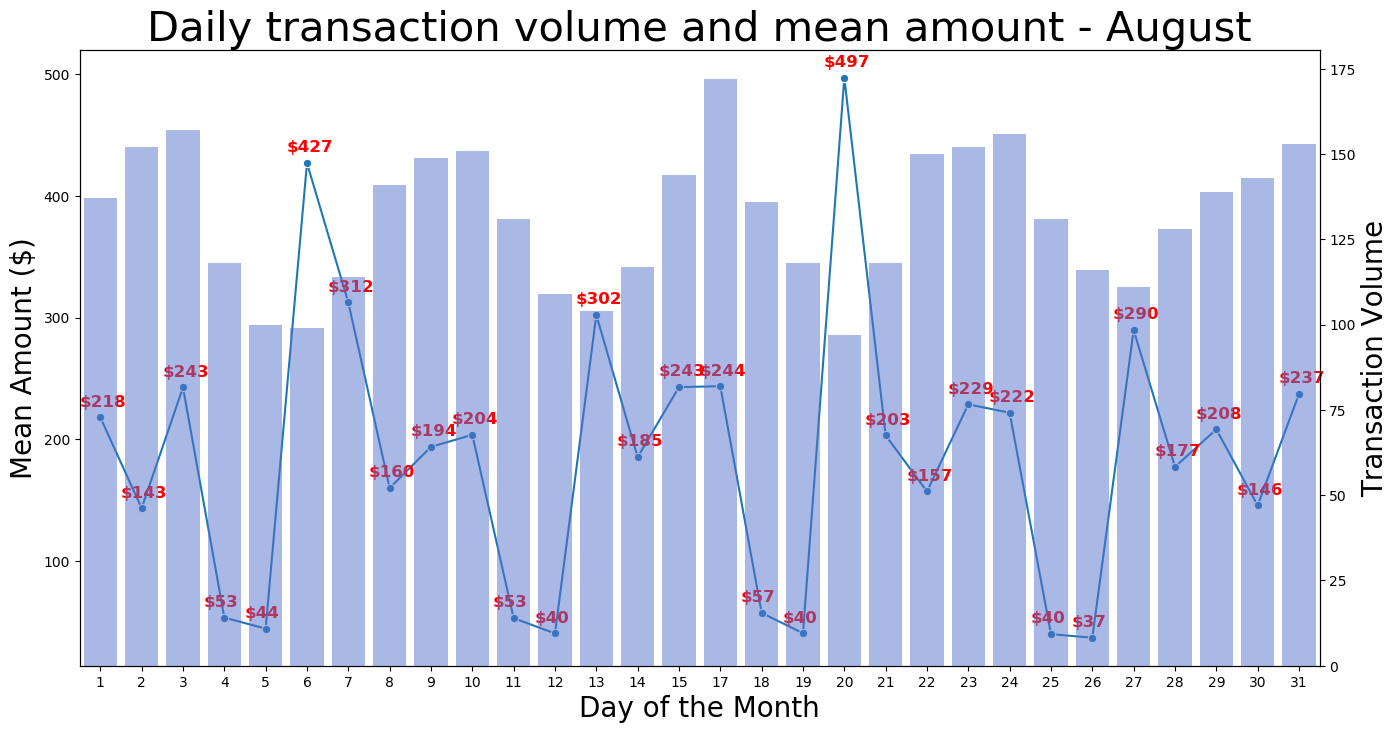

In [763]:
PlotMonthlyTran(Aug)

### September

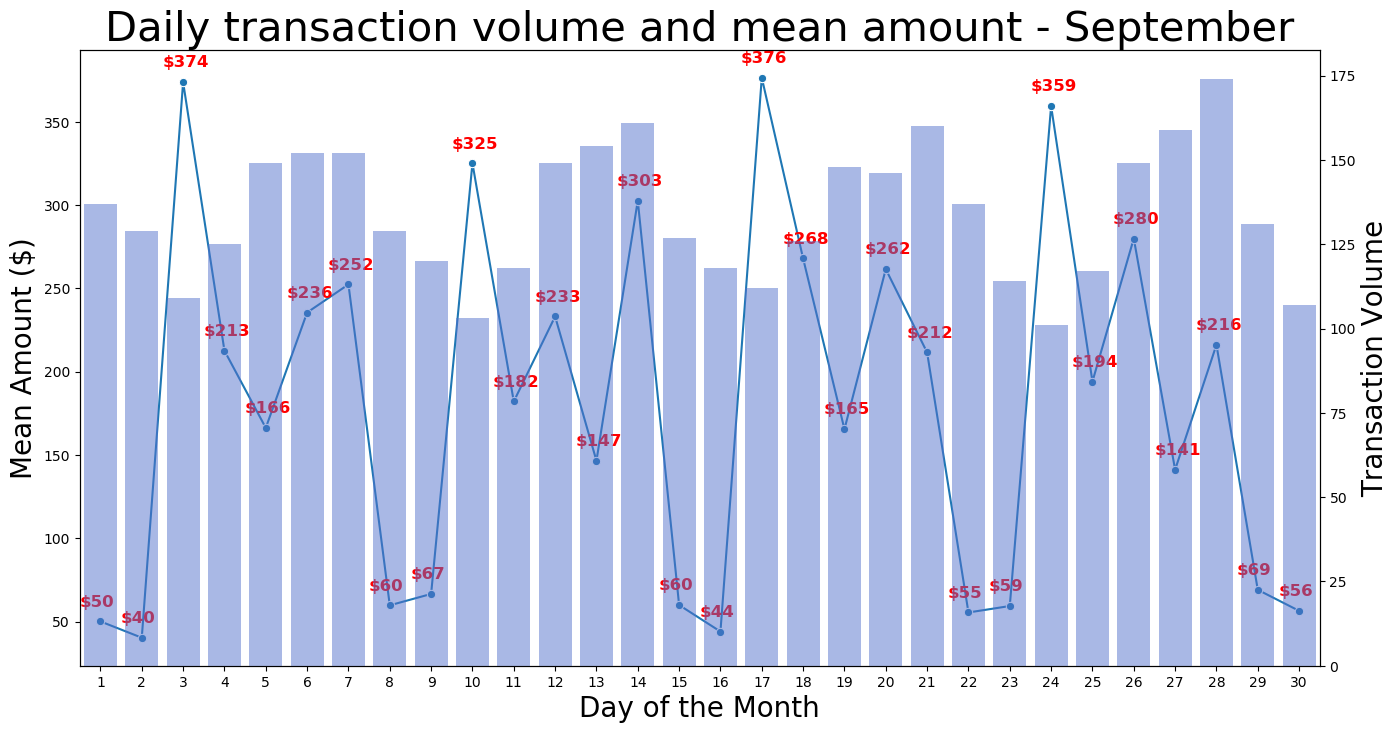

In [764]:
PlotMonthlyTran(Sept)

### October

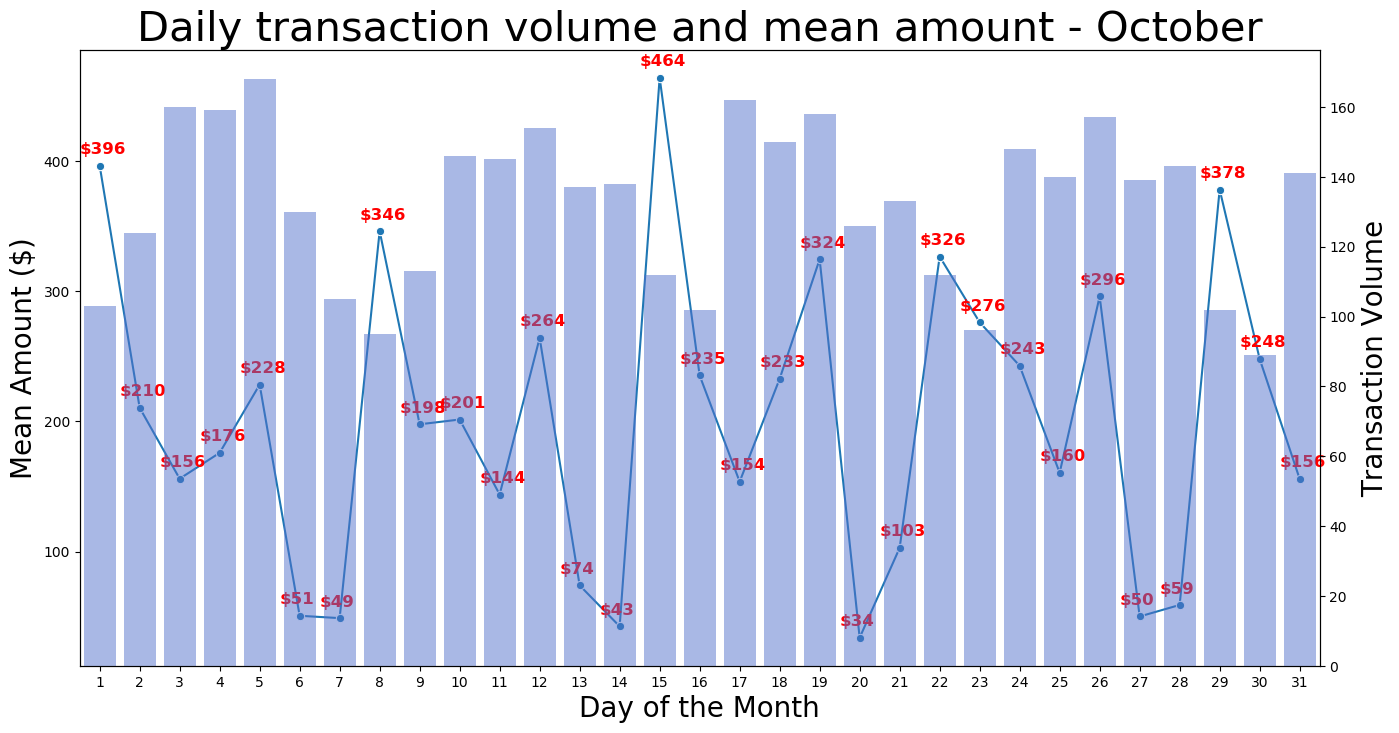

In [765]:
PlotMonthlyTran(Oct)

#### 3.Visualised mean customer balance and mean payment amount by age, with gender means included, for each month.

In [791]:
new_df=df.groupby(['age','gender','Month'],as_index=False).agg({'balance':'mean','amount':'mean'})

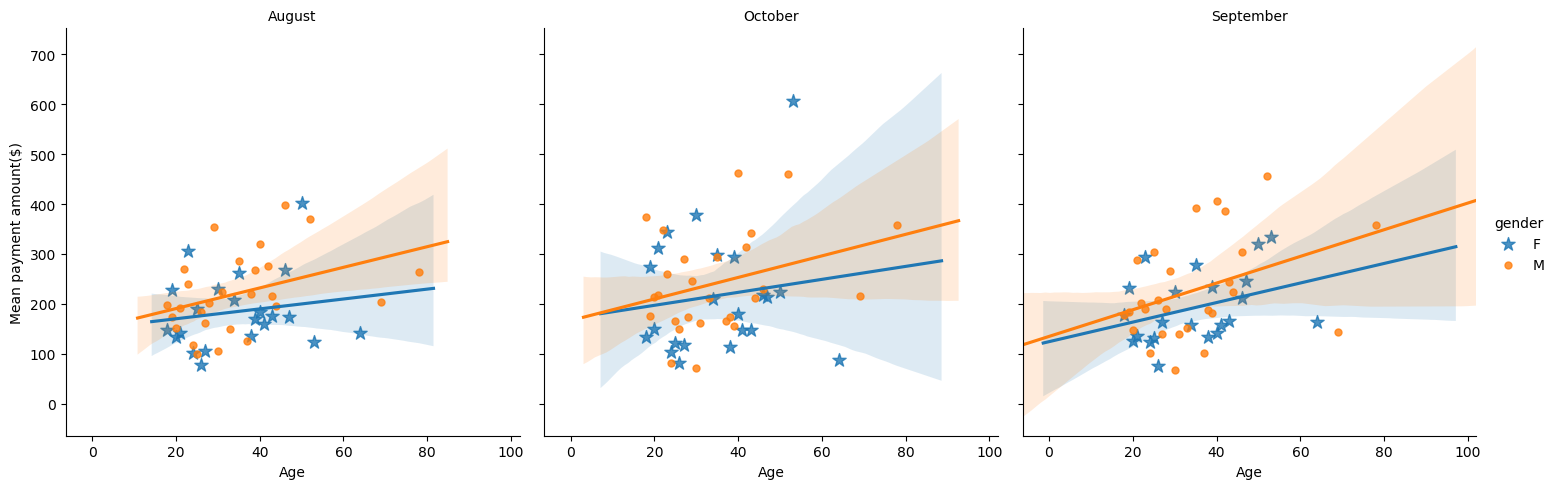

In [813]:
g1 = sns.lmplot(x='age', y='amount',hue='gender',col='Month',
                scatter_kws={'s':100},data=new_df,markers=['*','.'])
g1.set_titles(col_template='{col_name}')
g1.set_xlabels('Age')
g1.set_ylabels('Mean payment amount($)')

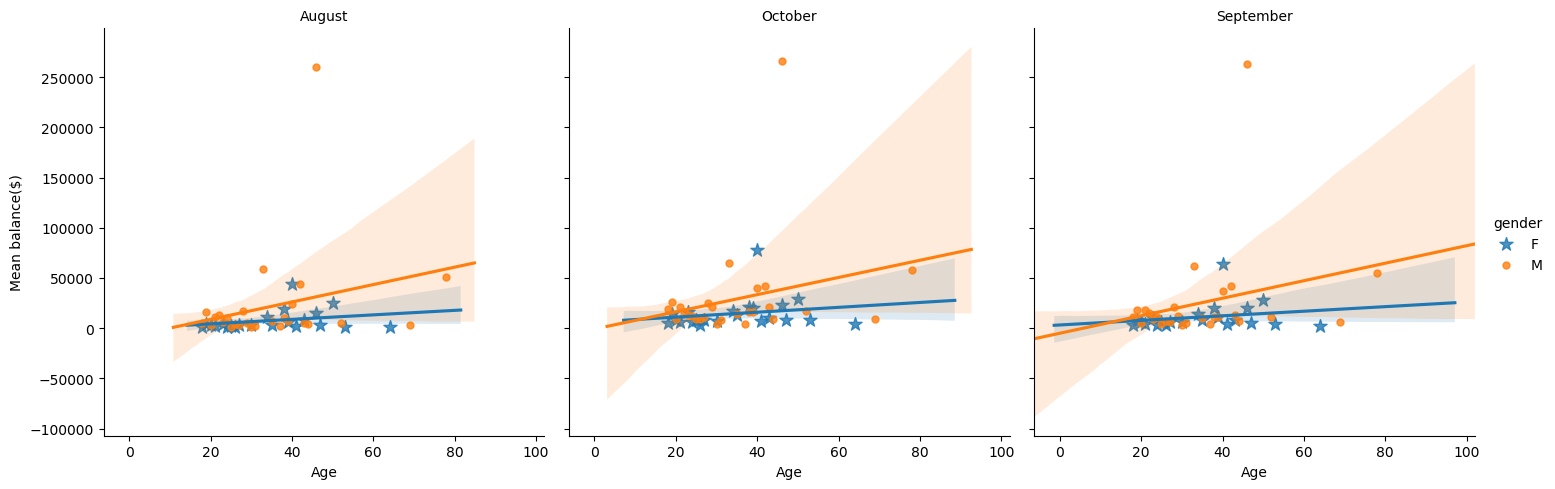

In [817]:
g2 = sns.lmplot(x='age', y='balance',hue='gender',col='Month',
                scatter_kws={'s':100},data=new_df,markers=['*','.'])
g2.set_titles(col_template='{col_name}')
g2.set_xlabels('Age')
g2.set_ylabels('Mean balance($)')

## Task 2 

#### 1. Used Pandas to evaluate mean customer annual salary and then grouped customer data by customer id and mean 

In [919]:
# Subset the dataset with salary related transactions
Salaries=df[df.txn_description=='PAY/SALARY']
# Grouped customer data by customer id and mean
EstSalaries=Salaries.groupby(['customer_id']).mean()
EstSalaries.head()

,card_present_flag,merchant_code,balance,age,amount
customer_id,,,,,
CUS-1005756958,NaN,0.0,4718.665385,53,970.47
CUS-1117979751,NaN,0.0,11957.202857,21,3578.65
CUS-1140341822,NaN,0.0,5841.720000,28,1916.51
CUS-1147642491,NaN,0.0,8813.467692,34,1711.39
CUS-1196156254,NaN,0.0,23845.717143,34,3903.73


In [920]:
# Add annual_salary column to the dataset
# To get estimated "annual salary" we need to get back to check the frequency of pay/salary transaction later
salaries = []

for customer_id in df['customer_id']:
    salaries.append(int(EstSalaries.loc[customer_id]['amount']))
    
df['Estimated_Annual_Salary'] = salaries

In [921]:
# Grouped customer data by customer id and mean with estimated annual salary
df_customer=df.groupby('customer_id').mean()
df_customer.head()

,card_present_flag,merchant_code,balance,age,amount,Estimated_Annual_Salary
customer_id,,,,,,
CUS-1005756958,0.812500,0.0,2275.852055,53,222.862603,970
CUS-1117979751,0.826923,0.0,9829.929000,21,339.843700,3578
CUS-1140341822,0.815385,0.0,5699.212250,28,212.632500,1916
CUS-1147642491,0.750000,0.0,9032.841186,34,245.600169,1711
CUS-1196156254,0.785276,0.0,22272.433755,34,147.145796,3903


#### 2. Used Scikit-learn for machine learning algorithms in Python:<br>
a. Linear regression model:<br>
used card present flag, merchant code, balance, age and amount from grouped data set to predict annual salary,obtained test prediction accuracy of -0.32. 


### Linear regression model

In [1074]:
# Import Linear Regression model
from sklearn.linear_model import LinearRegression

# Split the dataset into 2 parts, first 80% is for training, the rest is for testing
train_pct_index = int(0.8 * len(EstSalaries))
X_train, X_test = df_customer.drop('Estimated_Annual_Salary', axis=1).iloc[:train_pct_index], df_customer.drop('Estimated_Annual_Salary', axis=1).iloc[train_pct_index:]
y_train, y_test = df_customer.Estimated_Annual_Salary.iloc[:train_pct_index], df_customer.Estimated_Annual_Salary.iloc[train_pct_index:]

# Create linear regression model
linear_reg = LinearRegression()

# Train the linear regression model
linear_reg.fit(X_train, Y_train)

# Linear Regression Train accuracy 
linear_reg.score(X_train, Y_train)
linear_reg.predict(X_test)

# Linear Regression Test accuracy 
linear_reg.score(X_test, Y_test)

print('Linear Regression Test accuracy is','{:.2f}'.format(linear_reg.score(X_test, Y_test))) 

Linear Regression Test accuracy is -0.32


##### Use train test split for evaluation

In [1076]:
#split the data into features x and label y
X=df_customer.iloc[:,:5]
y=df_customer.iloc[:,-1]

In [1080]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=1)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)
#Linear Regression Train accuracy 
train_score=reg_all.score(X_train, y_train)
test_score=linear_reg.score(X_test, Y_test)

#Linear Regression Test accuracy 
print('Linear Regression Test accuracy is','{:.2f}'.format(test_score)) 

Linear Regression Test accuracy is -0.05


b. Decision tree classifier and regression models:<br> 
Reverting back to original data set, created dummy variables for categorical variables including gender and age.<br>Used modified data set to predict annual salary, obtained test scores of 0.76 and 0.67 respectively.

### Decision tree classifier

In [1067]:
# Split dataset in features and target variable
df_cat=df[{'gender','merchant_state','movement','txn_description','age'}]
# Features
X1 = pd.get_dummies(df_cat) 
# Target variable
y1 = df['Estimated_Annual_Salary']# Target variable

In [1092]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Split the dataset into 2 parts, first 80% is for training, the rest is for testing
train_pct_index = int(0.8 * len(df))
X1_train, X1_test = X1.iloc[:train_pct_index], X1.iloc[train_pct_index:]
y1_train, y1_test = y1.iloc[:train_pct_index], y1.iloc[train_pct_index:]

# Create Decision Tree classifer object
DTclf = DecisionTreeClassifier()

# Train Decision Tree Classifer
DTclf.fit(X1_train,y1_train)

# Decision Tree Classifer Train accuracy 
DTclf.score(X1_train, y1_train)

DTclf.predict(X1_test)

# Linear Regression Test accuracy 
DTclf.score(X1_test, y1_test)

print('Decision Tree Classifer Test accuracy is','{:.2f}'.format(DTclf.score(X1_test, y1_test))) 

Decision Tree Classifer Test accuracy is 0.76


##### Use train test split for evaluation

In [1093]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size = 0.2, random_state=0)
DecisionTreeClf = DecisionTreeClassifier()
DecisionTreeClf.fit(X1_train, y1_train)
y1_pred = DecisionTreeClf.predict(X1_test)

#Decision Tree Classifer Train accuracy
DecisionTreeClf_rain_score=DecisionTreeClf.score(X1_train, y1_train)
DecisionTreeClf_test_score=DecisionTreeClf.score(X1_test, y1_test)

#Linear Regression Test accuracy 
print('Decision Tree Classifer Test accuracy is','{:.2f}'.format(DecisionTreeClf_test_score)) 

Decision Tree Classifer Test accuracy is 0.77


### Decision tree regression

In [1114]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 

# Split the dataset into 2 parts, first 80% is for training, the rest is for testing
train_pct_index = int(0.8 * len(df))
X1_train, X1_test = X1.iloc[:train_pct_index], X1.iloc[train_pct_index:]
y1_train, y1_test = y1.iloc[:train_pct_index], y1.iloc[train_pct_index:]

# Create Decision Tree Regression 
DTregressor = DecisionTreeRegressor()

# Train Decision Tree Regression 
DTregressor.fit(X1_train, y1_train)

# Decision Tree Regression Train accuracy 
DTregressor.score(X1_train, y1_train)

DTregressor.predict(X1_test)

# Decision Tree Regression Test accuracy 
DTregressor.score(X1_test, y1_test)

print('Decision Tree Regression Test accuracy is','{:.4f}'.format(DTregressor.score(X1_test, y1_test))) 


Decision Tree Regression Test accuracy is 0.6731


##### Use train test split for evaluation

In [1115]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size = 0.2, random_state=0)
DecisionTreeReg = DecisionTreeRegressor()
DecisionTreeReg.fit(X1_train, y1_train)
y1_pred = DecisionTreeReg.predict(X1_test)

#Decision Tree Classifer Train accuracy
DecisionTreeReg_rain_score=DecisionTreeReg.score(X1_train, y1_train)
DecisionTreeReg_test_score=DecisionTreeReg.score(X1_test, y1_test)

#Linear Regression Test accuracy 
print('Decision Tree Regression Test accuracy is','{:.4f}'.format(DecisionTreeReg_test_score)) 

Decision Tree Regression Test accuracy is 0.7098
